#### PCA From Scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Iris.csv')
cols=['sepal length', 'sepal width', 'petal length', 'petal width']
df_iris = pd.DataFrame(df,columns=cols)
df_iris.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
## Standralizing the Data
from sklearn import preprocessing
x = df_iris.values #returns a numpy array
# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
df_iris = scaler.fit_transform(x)
df_iris_standralize = pd.DataFrame(df_iris,columns=cols)
df_iris_standralize.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [4]:
## Find Covariance Matrix of Data-set
## Covariance Matrix will be n*n where n is Number of features
df_iris_standralize_cov=df_iris_standralize.cov()
df_iris_standralize_cov

,sepal length,sepal width,petal length,petal width
sepal length,1.006711,-0.110103,0.877605,0.823443
sepal width,-0.110103,1.006711,-0.423338,-0.358937
petal length,0.877605,-0.423338,1.006711,0.969219
petal width,0.823443,-0.358937,0.969219,1.006711


In [5]:
## Matrix Form of DataFrame
matrix_iris_standralize_cov=df_iris_standralize_cov.values
matrix_iris_standralize_cov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [6]:
## Calculating eigen velues
## Eigen-values are depend upon the number of features In Iris Dataset we have 4-features so eigen value is 4
from numpy import linalg
eigenvalues,eigenvector=np.linalg.eig(matrix_iris_standralize_cov)
print('Eigen-Values are:\n',eigenvalues)
print('Eigen-Vector are:\n',eigenvector)

Eigen-Values are:
 [2.93035378 0.92740362 0.14834223 0.02074601]
Eigen-Vector are:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [7]:
print("PC1",eigenvalues[0]/sum(eigenvalues))
print("PC2",eigenvalues[1]/sum(eigenvalues))
print("PC3",eigenvalues[2]/sum(eigenvalues))
print("PC4",eigenvalues[3]/sum(eigenvalues))

PC1 0.7277045209380134
PC2 0.2303052326768063
PC3 0.03683831957627389
PC4 0.005151926808906395


In [8]:
print('Remember my First eigen vector is 1st column of eigen matrix')
print('Remember my First eigen vector is 2nd column of eigen matrix')

Remember my First eigen vector is 1st column of eigen matrix
Remember my First eigen vector is 2nd column of eigen matrix


In [9]:
print('Projection only by PC1')
projected_X_PC1 = df_iris_standralize.dot(eigenvector.T[0])
print('shape of PC1 is',projected_X_PC1.shape)
print('Projection only by PC2')
projected_X_PC2 = df_iris_standralize.dot(-eigenvector.T[1])
print('shape of PC2 is',projected_X_PC2.shape)

Projection only by PC1
shape of PC1 is (150,)
Projection only by PC2
shape of PC2 is (150,)


Cummulative Explained-Variance [ 72.77045209  95.80097536  99.48480732 100.        ]


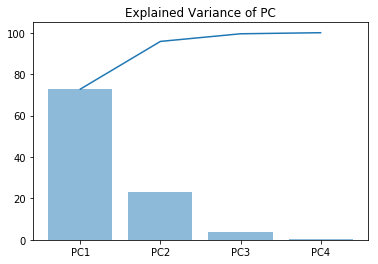

In [10]:
total = sum(eigenvalues)
var_exp = [(i / total)*100 for i in sorted(eigenvalues, reverse=True)]

objects=('PC1', 'PC2', 'PC3', 'PC4')
y=np.arange(len(objects))
plt.bar(y, var_exp, align='center', alpha=0.5)
plt.xticks(y, objects)
plt.title('Explained Variance of PC')

cum_var_exp = np.cumsum(var_exp)
plt.plot(cum_var_exp)

print('Cummulative Explained-Variance',cum_var_exp)

In [11]:
### Changing it into Data-Frame
print('Creating a Data-Frame')
df_PCA=pd.DataFrame(projected_X_PC1, columns=['PC1'])
df_PCA['PC2']=projected_X_PC2
df_PCA['Label']=df['iris']
df_PCA.head()

Creating a Data-Frame


,PC1,PC2,Label
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Text(0.5,1,'PCA result')

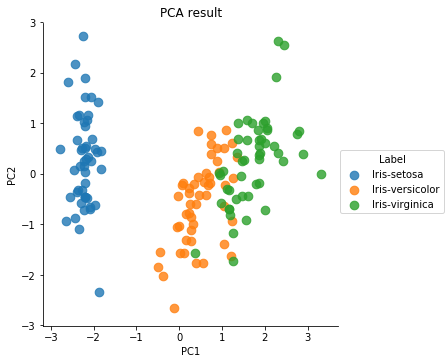

In [12]:
sns.lmplot('PC1', 'PC2',data=df_PCA, fit_reg=False,
           scatter_kws={"s": 75}, # marker size
           hue="Label") # color

# title
plt.title('PCA result')

#### PCA with Sklearn

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_iris_standralize.values)

In [14]:
PCA_Sklearn = pd.DataFrame(data = principalComponents
             , columns = ['PCA-1', 'PCA-2'])

In [15]:
finalDf = pd.concat([PCA_Sklearn, df['iris']], axis = 1)
finalDf.head()

,PCA-1,PCA-2,iris
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Text(0.5,1,'PCA result')

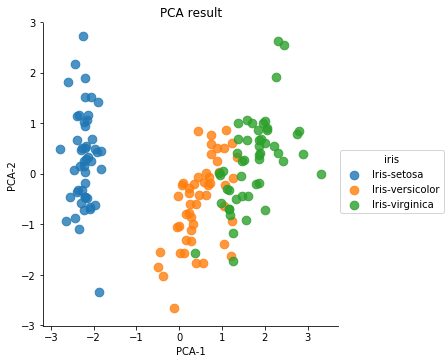

In [16]:
sns.lmplot('PCA-1', 'PCA-2',data=finalDf, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 75}, # marker size
           hue="iris") # color

# title
plt.title('PCA result')